ARIMA model

In [71]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [72]:
data = pd.read_csv('merged_TimeWVHT_data.csv')
data.describe

<bound method NDFrame.describe of          #YY    MM    DD       ATMP       WTMP      WVHT
0     2020.0   1.0   1.0  26.772222  28.212500  1.245833
1     2020.0   1.0   2.0  27.189928  28.054167  1.108333
2     2020.0   1.0   3.0  26.284722  27.933333  1.212500
3     2020.0   1.0   4.0  26.873611  27.754167  1.291667
4     2020.0   1.0   5.0  25.072222  27.808333  1.233333
...      ...   ...   ...        ...        ...       ...
1448  2023.0  12.0  27.0  25.494118  27.762500  1.295833
1449  2023.0  12.0  28.0  25.529167  27.775000  1.337500
1450  2023.0  12.0  29.0  25.337324  27.816667  1.183333
1451  2023.0  12.0  30.0  25.756643  27.658333  1.091667
1452  2023.0  12.0  31.0  25.808451  27.595833  1.254167

[1453 rows x 6 columns]>

In [73]:
# Remove outliers in WVHT
q1 = data['WVHT'].quantile(0.25)
q3 = data['WVHT'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

data_filtered = data[(data['WVHT'] >= lower_bound) & (data['WVHT'] <= upper_bound)]

Set time index

In [74]:
# Assuming '#YY', 'MM', and 'DD' are columns for year, month, and day
data['date'] = pd.to_datetime(dict(year=data['#YY'], month=data['MM'], day=data['DD']))

# Set the datetime as the index
data.set_index('date', inplace=True)
data

,#YY,MM,DD,ATMP,WTMP,WVHT
date,,,,,,
2020-01-01,2020.0,1.0,1.0,26.772222,28.212500,1.245833
2020-01-02,2020.0,1.0,2.0,27.189928,28.054167,1.108333
2020-01-03,2020.0,1.0,3.0,26.284722,27.933333,1.212500
2020-01-04,2020.0,1.0,4.0,26.873611,27.754167,1.291667
2020-01-05,2020.0,1.0,5.0,25.072222,27.808333,1.233333
...,...,...,...,...,...,...
2023-12-27,2023.0,12.0,27.0,25.494118,27.762500,1.295833
2023-12-28,2023.0,12.0,28.0,25.529167,27.775000,1.337500
2023-12-29,2023.0,12.0,29.0,25.337324,27.816667,1.183333


visualize WVHT

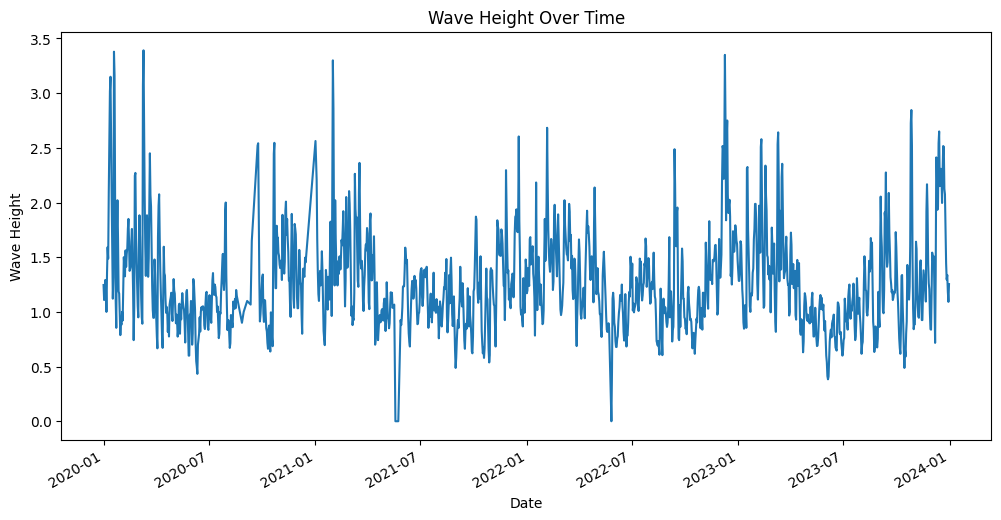

In [75]:
import matplotlib.pyplot as plt

# Plot wave height over time
data['WVHT'].plot(title='Wave Height Over Time', figsize=(12, 6))
plt.xlabel('Date')
plt.ylabel('Wave Height')
plt.show()

Include Environmental Variables: ATMP WTMP

In [76]:
model = SARIMAX(data['WVHT'], 
                order=(1, 1, 1), 
                seasonal_order=(1, 1, 1, 12))
model_fit = model.fit()
print(model_fit.summary())

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.72290D-01    |proj g|=  1.00611D+00

At iterate    5    f=  2.12122D-01    |proj g|=  2.06575D-01

At iterate   10    f=  1.28604D-01    |proj g|=  1.71358D-01

At iterate   15    f=  1.22427D-01    |proj g|=  2.94175D-02

At iterate   20    f=  1.17005D-01    |proj g|=  1.31701D-02

At iterate   25    f=  1.16716D-01    |proj g|=  1.27404D-02

At iterate   30    f=  1.16650D-01    |proj g|=  3.16661D-03

At iterate   35    f=  1.16637D-01    |proj g|=  6.73906D-04

At iterate   40    f=  1.16636D-01    |proj g|=  8.06714D-04
  ys=-1.102E-06  -gs= 1.150E-06 BFGS update SKIPPED

At iterate   45    f=  1.16636D-01    |proj g|=  4.31765D-03


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  1.16635D-01    |proj g|=  4.15866D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     75      1     1     0   4.159D-05   1.166D-01
  F =  0.11663501342319089     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
                                     SARIMAX Results                                      
Dep. Variable:                               WVHT   No. Observations:                 1453
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -169.471
Date:                            Fri, 06 Dec 2024   AIC                            348.9

In [77]:
print(data.columns)

Index(['#YY', 'MM', 'DD', 'ATMP', 'WTMP', 'WVHT'], dtype='object')


Columns in the DataFrame:
Index(['#YY', 'MM', 'DD', 'ATMP', 'WTMP', 'WVHT', 'WVHT_rolling_mean',
       'WVHT_rolling_std', 'month', 'day'],
      dtype='object')
Creating 'date' column from '#YY', 'MM', 'DD'...
Checking for NaT in 'date'...
Number of valid dates: 1453


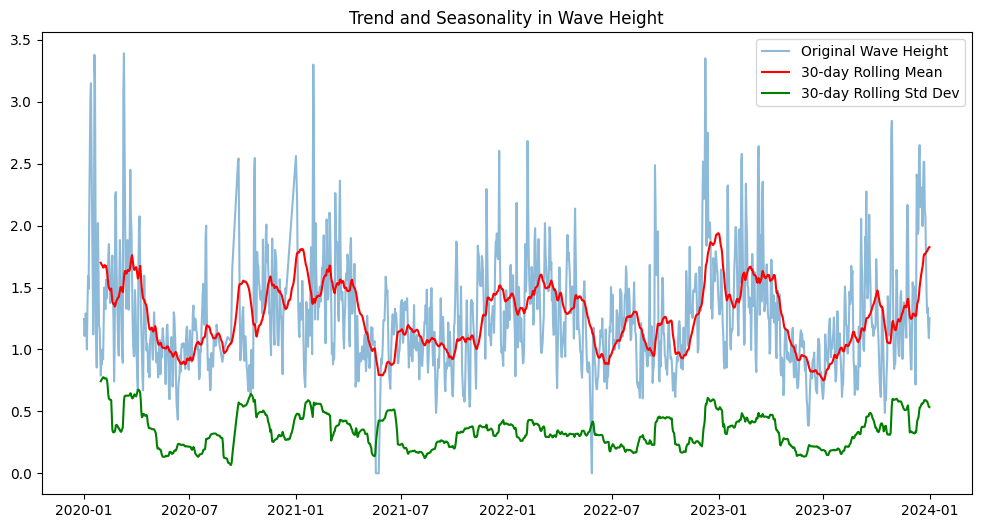

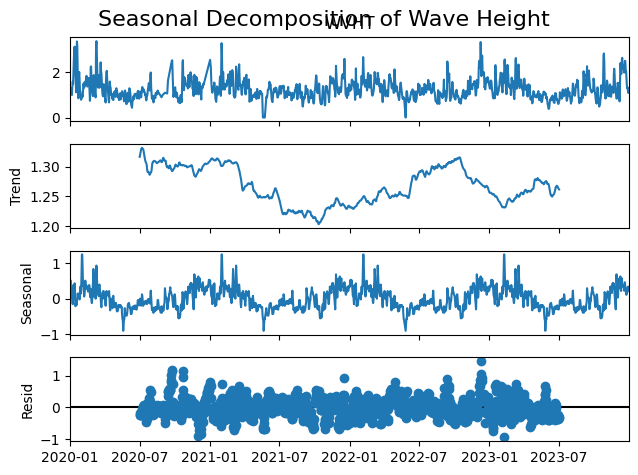

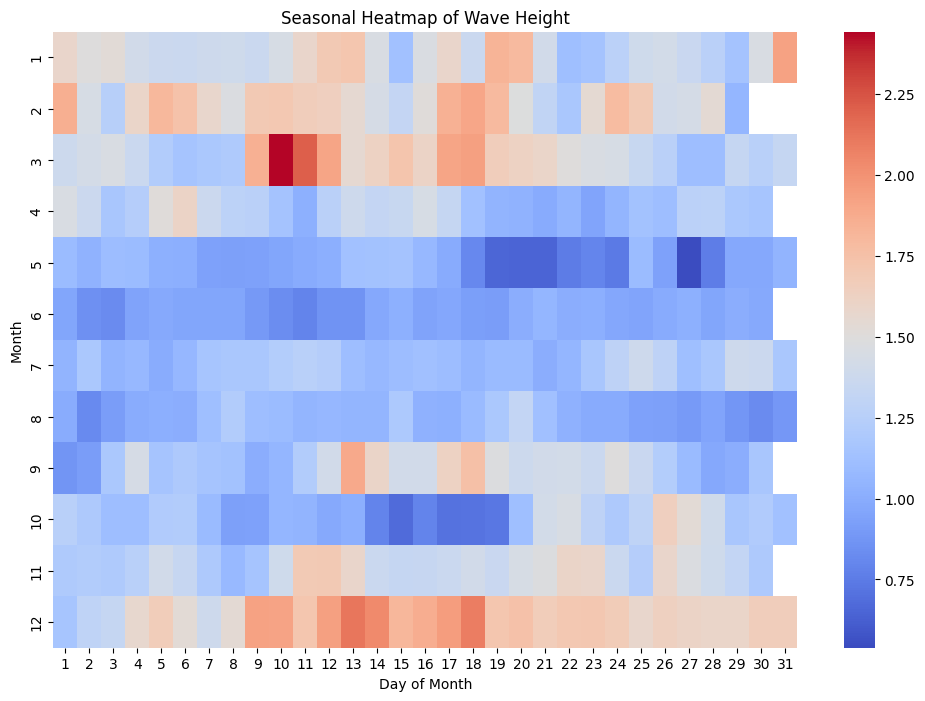

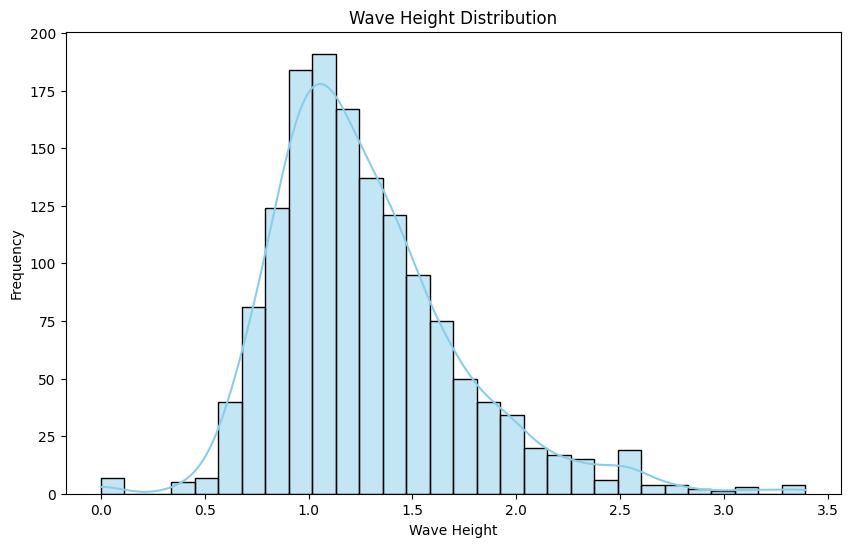

<Figure size 1200x600 with 0 Axes>

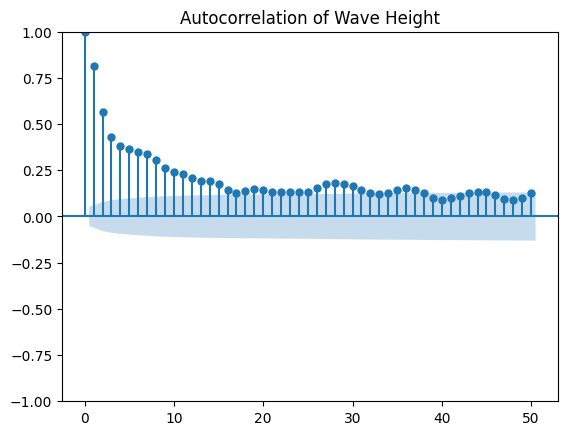

<Figure size 1200x600 with 0 Axes>

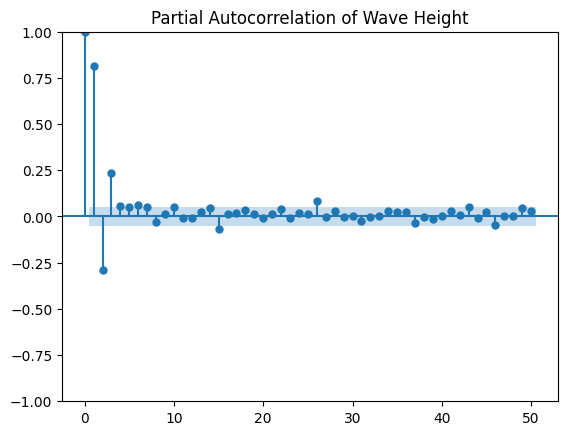

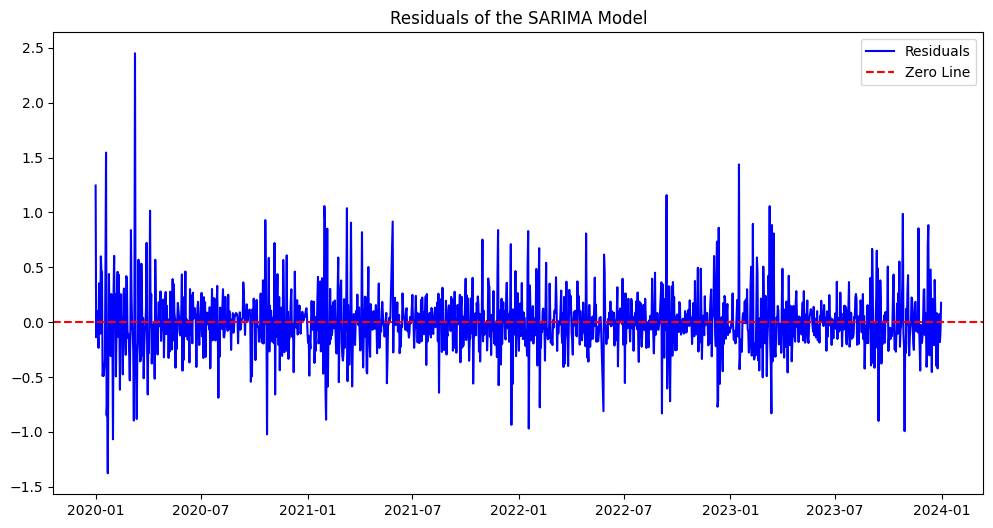

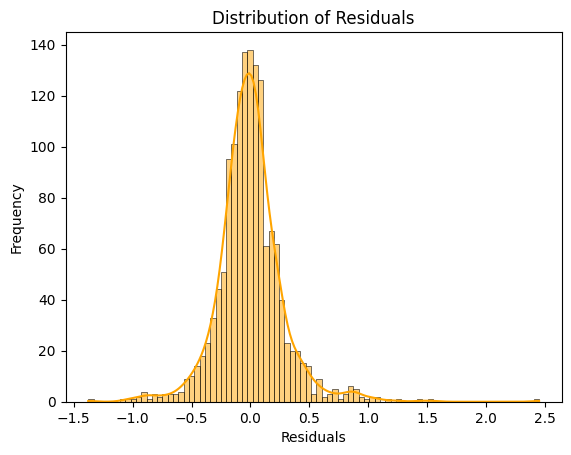

/var/folders/j6/gnlkxfsx0mz7c1ngs9mbs16m0000gn/T/ipykernel_70217/3984690110.py:95: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = data['WVHT'].resample('M').mean()


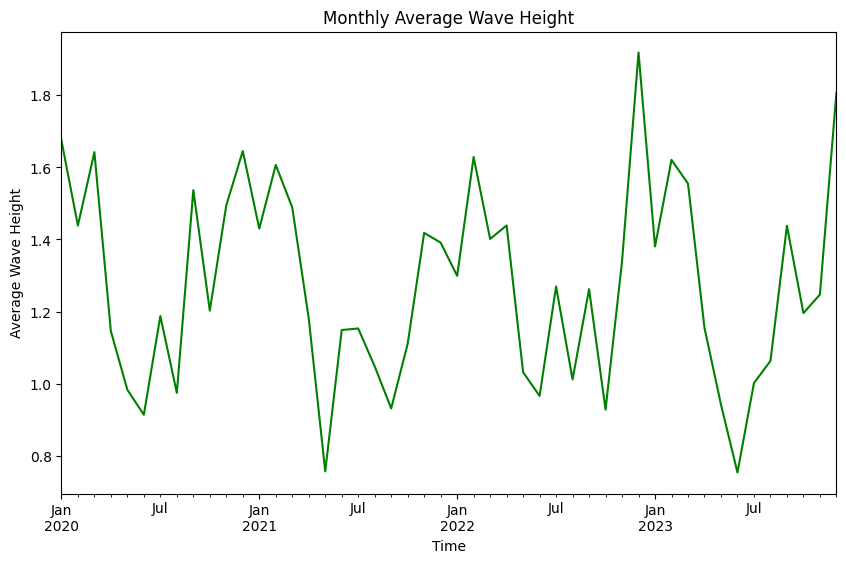

/var/folders/j6/gnlkxfsx0mz7c1ngs9mbs16m0000gn/T/ipykernel_70217/3984690110.py:106: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data.index.month, y=data['WVHT'], palette='coolwarm')


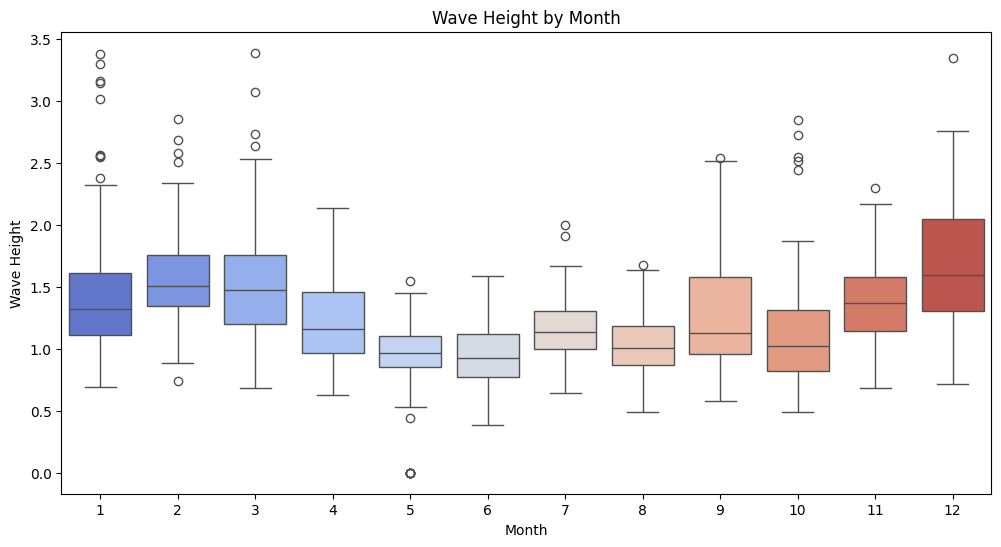

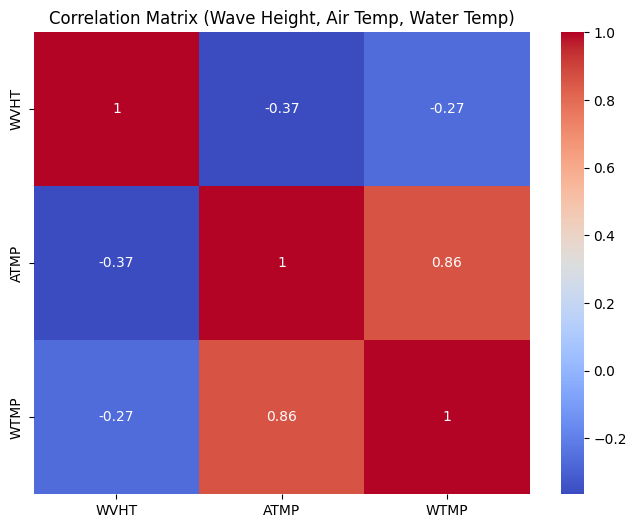

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Step 1: Verify columns in the dataset
print("Columns in the DataFrame:")
print(data.columns)

# Step 2: Create the 'date' column if it doesn't exist
if 'date' not in data.columns:
    print("Creating 'date' column from '#YY', 'MM', 'DD'...")
    data['date'] = pd.to_datetime(
        dict(year=data['#YY'], month=data['MM'], day=data['DD']),
        errors='coerce'
    )

# Step 3: Drop rows with invalid or missing 'date' values
print("Checking for NaT in 'date'...")
data = data.dropna(subset=['date'])
print("Number of valid dates:", len(data))

# Step 4: Set 'date' as the index
data.set_index('date', inplace=True)

# Step 5: Visualizations
# 1. Rolling Mean and Standard Deviation (Trend and Seasonality)
data['WVHT_rolling_mean'] = data['WVHT'].rolling(window=30).mean()
data['WVHT_rolling_std'] = data['WVHT'].rolling(window=30).std()

plt.figure(figsize=(12, 6))
plt.plot(data['WVHT'], label='Original Wave Height', alpha=0.5)
plt.plot(data['WVHT_rolling_mean'], label='30-day Rolling Mean', color='red')
plt.plot(data['WVHT_rolling_std'], label='30-day Rolling Std Dev', color='green')
plt.title('Trend and Seasonality in Wave Height')
plt.legend()
plt.show()

# 2. Seasonal Decomposition
decomposition = seasonal_decompose(data['WVHT'], model='additive', period=365)  # Adjust period if needed
decomposition.plot()
plt.suptitle('Seasonal Decomposition of Wave Height', fontsize=16)
plt.show()

# 3. Heatmap of Seasonal Patterns
data['month'] = data.index.month
data['day'] = data.index.day
pivot_table = data.pivot_table(values='WVHT', index='month', columns='day', aggfunc='mean')

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='coolwarm', annot=False)
plt.title('Seasonal Heatmap of Wave Height')
plt.xlabel('Day of Month')
plt.ylabel('Month')
plt.show()

# 4. Wave Height Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['WVHT'], kde=True, bins=30, color='skyblue')
plt.title('Wave Height Distribution')
plt.xlabel('Wave Height')
plt.ylabel('Frequency')
plt.show()

# 5. Autocorrelation and Partial Autocorrelation
plt.figure(figsize=(12, 6))
plot_acf(data['WVHT'], lags=50)
plt.title('Autocorrelation of Wave Height')
plt.show()

plt.figure(figsize=(12, 6))
plot_pacf(data['WVHT'], lags=50)
plt.title('Partial Autocorrelation of Wave Height')
plt.show()

# 6. Residual Diagnostics
# Assuming `model_fit` is the result of your SARIMA/SARIMAX model
residuals = model_fit.resid

plt.figure(figsize=(12, 6))
plt.plot(residuals, label='Residuals', color='blue')
plt.axhline(y=0, color='red', linestyle='--', label='Zero Line')
plt.title('Residuals of the SARIMA Model')
plt.legend()
plt.show()

sns.histplot(residuals, kde=True, color='orange')
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# 7. Monthly Average Wave Height
monthly_avg = data['WVHT'].resample('M').mean()

plt.figure(figsize=(10, 6))
monthly_avg.plot(kind='line', color='green')
plt.title('Monthly Average Wave Height')
plt.xlabel('Time')
plt.ylabel('Average Wave Height')
plt.show()

# 8. Boxplot of Wave Height by Month
plt.figure(figsize=(12, 6))
sns.boxplot(x=data.index.month, y=data['WVHT'], palette='coolwarm')
plt.title('Wave Height by Month')
plt.xlabel('Month')
plt.ylabel('Wave Height')
plt.show()

# 9. Correlation Matrix
corr_matrix = data[['WVHT', 'ATMP', 'WTMP']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (Wave Height, Air Temp, Water Temp)')
plt.show()

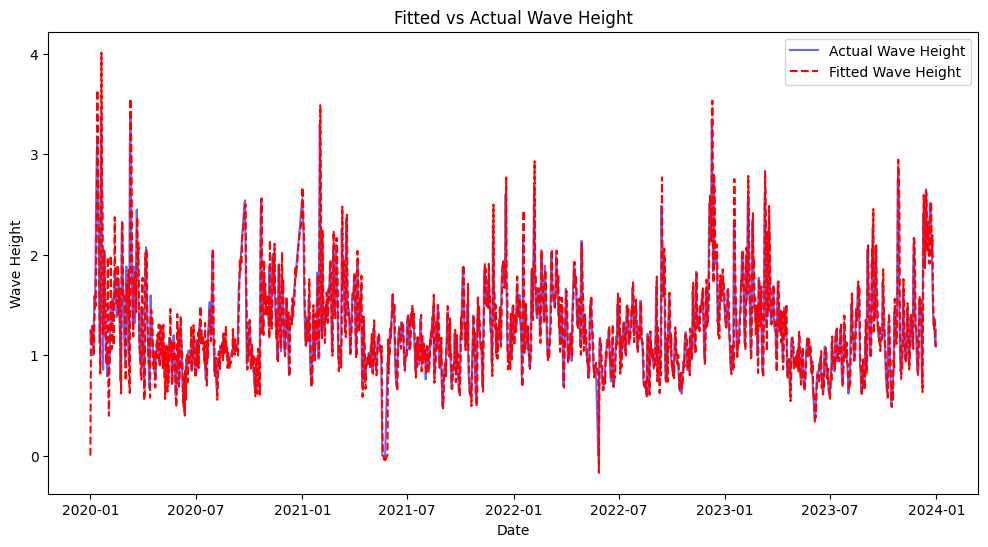

In [80]:
# Assuming `model_fit` is your fitted SARIMA/SARIMAX model
fitted_values = model_fit.fittedvalues

# Plot actual values vs fitted values
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['WVHT'], label='Actual Wave Height', color='blue', alpha=0.6)
plt.plot(fitted_values, label='Fitted Wave Height', color='red', linestyle='--')
plt.title('Fitted vs Actual Wave Height')
plt.xlabel('Date')
plt.ylabel('Wave Height')
plt.legend()
plt.show()

In [81]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Actual values
actual = data['WVHT']

# Fitted values from the model
fitted = model_fit.fittedvalues

# Calculate metrics
mae = mean_absolute_error(actual, fitted)
mse = mean_squared_error(actual, fitted)
rmse = np.sqrt(mse)
r2 = r2_score(actual, fitted)

# Print results
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R2): {r2:.4f}")

Mean Absolute Error (MAE): 0.1911
Mean Squared Error (MSE): 0.0783
Root Mean Squared Error (RMSE): 0.2799
R-squared (R2): 0.6230


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


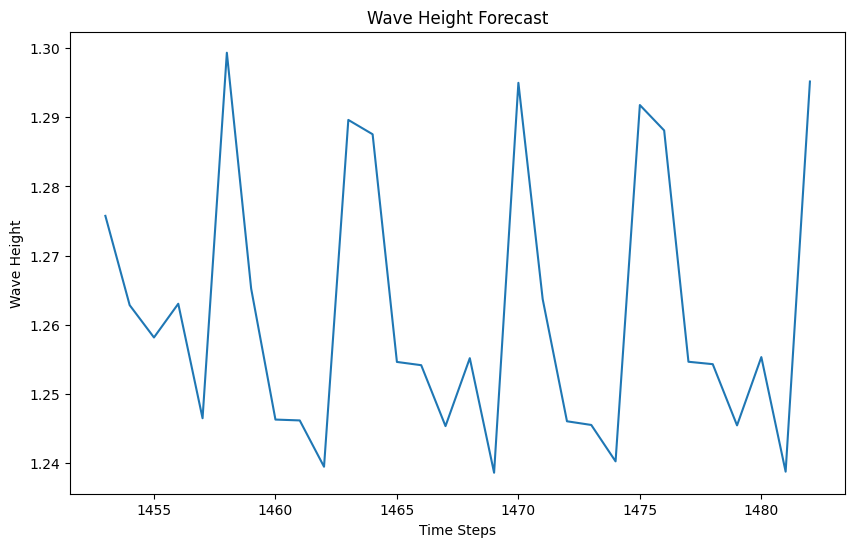

In [82]:
import numpy as np

# Forecast the next 30 time steps
steps = 30

# Generate future exogenous variables (example: assume constant or mean values)
future_exog = np.tile(data[['ATMP', 'WTMP']].iloc[-1].values, (steps, 1))

# Forecast with exogenous variables
forecast = model_fit.forecast(steps=steps, exog=future_exog)

# Plot the forecast
forecast_series = pd.Series(forecast, name="Forecasted Wave Height")
forecast_series.plot(title='Wave Height Forecast', figsize=(10, 6))
plt.xlabel('Time Steps')
plt.ylabel('Wave Height')
plt.show()

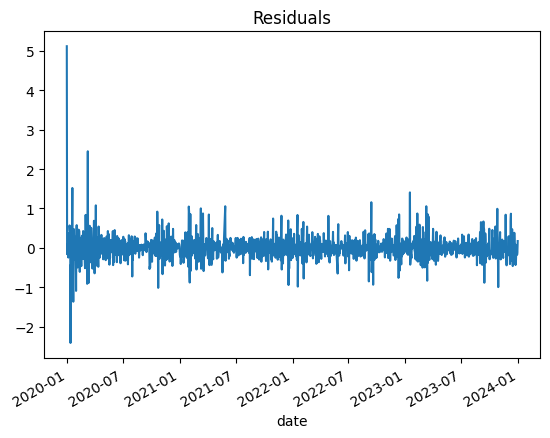

count    1453.000000
mean        0.000776
std         0.313621
min        -2.410071
25%        -0.141188
50%        -0.012616
75%         0.114789
max         5.115343
dtype: float64


In [65]:
# Plot residuals
residuals = model_fit.resid
residuals.plot(title='Residuals')
plt.show()

# Check residual statistics
print(residuals.describe())

Grid search for best p, d, q

In [ ]:
import itertools
import pandas as pd

# Define p, d, q values to try
p = d = q = range(0, 3)

# Generate all combinations of p, d, q
pdq = list(itertools.product(p, d, q))

# Iterate over all combinations
best_aic = float("inf")
best_order = None
for order in pdq:
    try:
        model = ARIMA(data['WVHT'], order=order)
        model_fit = model.fit()
        if model_fit.aic < best_aic:
            best_aic = model_fit.aic
            best_order = order
    except:
        continue

print(f"Best ARIMA order: {best_order} with AIC: {best_aic}")

Best ARIMA order: None with AIC: inf
